# Initial code exploration

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
recipe_path = "https://raw.githubusercontent.com/lorenzomad/foodMapping/main/data/RAW_recipes.csv"

recipes_df = pd.read_csv(recipe_path, index_col="id")

In [4]:
recipes_df.head()

,name,ingredients,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
id,,,,,,,,,
137739,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
31490,a bit different breakfast pizza,"['prepared pizza crust', 'sausage patty', 'egg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
112140,all in the kitchen chili,"['ground beef', 'yellow onions', 'diced tomato...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
59389,alouette potatoes,"['spreadable cheese with garlic and herbs', 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
44061,amish tomato ketchup for canning,"['tomato juice', 'apple cider vinegar', 'sugar...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's create the starting dataframe with only the relevant characteristics

In [5]:
recipes_df = recipes_df[["name", "ingredients"]].sort_values("id")
recipes_df.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"['blueberries', 'granulated sugar', 'vanilla y..."
39,biryani,"['saffron', 'milk', 'hot green chili peppers',..."
40,best lemonade,"['sugar', 'lemons, rind of', 'fresh water', 'f..."
41,carina s tofu vegetable kebabs,"['extra firm tofu', 'eggplant', 'zucchini', 'r..."
43,best blackbottom pie,"['graham cracker crumbs', 'sugar', 'butter', '..."


Now we want to work on the df to extract all the ingredient names
1) convert the items to lists

In [6]:
recipes_df["ingredients"] = recipes_df["ingredients"].apply(eval)
recipes_df.head()

,name,ingredients
id,,
38,low fat berry blue frozen dessert,"[blueberries, granulated sugar, vanilla yogurt..."
39,biryani,"[saffron, milk, hot green chili peppers, onion..."
40,best lemonade,"[sugar, lemons, rind of, fresh water, fresh le..."
41,carina s tofu vegetable kebabs,"[extra firm tofu, eggplant, zucchini, red pepp..."
43,best blackbottom pie,"[graham cracker crumbs, sugar, butter, cornsta..."


Now we can count how many elements are there for each ingredient and apply other actions

In [7]:
recipes_df["ingredients"].explode().value_counts()

salt                               85746
butter                             54975
sugar                              44535
onion                              39065
water                              34914
                                   ...  
spanish rice and vermicelli mix        1
fruit bits                             1
passover wine                          1
smoked trout fillet                    1
gummy ring                             1
Name: ingredients, Length: 14942, dtype: int64

Let's try to plot the top 20 used ingredients now

Text(0.5, 1.0, 'Ingredients used in recipes')

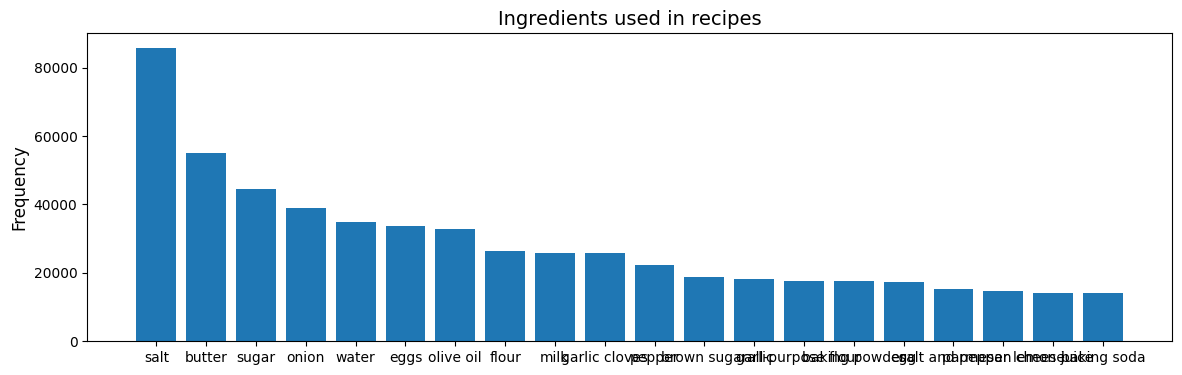

In [8]:
# Get unique items & counts
all_ingredients = recipes_df["ingredients"].explode().value_counts().index.tolist()
ingredient_counts = recipes_df["ingredients"].explode().value_counts().values
# Create plot
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(all_ingredients[:20], ingredient_counts[:20])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Ingredients used in recipes", size = 14)

There are a lot of ingredients, let's limit ourselves to the ones that appear in at least 10 recipes


In [9]:
ingredients = {"ingredient": all_ingredients, "count" : ingredient_counts }

ingredients_df = pd.DataFrame(ingredients)
ingredients_df

,ingredient,count
0,salt,85746
1,butter,54975
2,sugar,44535
3,onion,39065
4,water,34914
...,...,...
14937,spanish rice and vermicelli mix,1
14938,fruit bits,1
14939,passover wine,1
14940,smoked trout fillet,1


In [10]:
ingredients_df.shape

(14942, 2)

In [11]:
ingredients_short = ingredients_df[ingredients_df["count"] > 10]
ingredients_short.shape

(5741, 2)

this reduced the number of items to 1 third

to get much further in terms of our analysis my idea is to explode in our initial dataframe the ingredients column into *n* columns where n is the number of ingredients and the corresponding value will be 1 if the recipe has the specific ingredient

In [12]:
import time
import math

def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    start_time = math.floor(time.perf_counter())

    # Loop through all the tags
    for i, item in enumerate(unique_items):
      # simple progress bar
      if i % 100 == 0 :
        completion_perc = round(i / unique_items.size * 100, 2)
        print(f"Completion: { completion_perc}%")

        elapsed_time = math.floor(time.perf_counter()) - start_time
        time_left = math.floor(elapsed_time / (completion_perc if completion_perc != 0 else 0.0000001) * (100 - completion_perc))
        print(f"Time elapsed: {elapsed_time} s. expected to end in {time_left} s \n")

      # Apply boolean mask
      bool_dict[item] = item_lists.apply(lambda x: item in x)

    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)



# this step takes about 7 minutes
recipes_bool = boolean_df(
  item_lists = recipes_df["ingredients"],
  unique_items = ingredients_short["ingredient"]
)

Completion: 0.0%
Time elapsed: 0 s. expected to end in 0 s 

Completion: 1.74%
Time elapsed: 14 s. expected to end in 790 s 

Completion: 3.48%
Time elapsed: 24 s. expected to end in 665 s 

Completion: 5.23%
Time elapsed: 34 s. expected to end in 616 s 

Completion: 6.97%
Time elapsed: 44 s. expected to end in 587 s 

Completion: 8.71%
Time elapsed: 54 s. expected to end in 565 s 

Completion: 10.45%
Time elapsed: 64 s. expected to end in 548 s 

Completion: 12.19%
Time elapsed: 74 s. expected to end in 533 s 

Completion: 13.93%
Time elapsed: 85 s. expected to end in 525 s 

Completion: 15.68%
Time elapsed: 95 s. expected to end in 510 s 

Completion: 17.42%
Time elapsed: 106 s. expected to end in 502 s 

Completion: 19.16%
Time elapsed: 115 s. expected to end in 485 s 

Completion: 20.9%
Time elapsed: 126 s. expected to end in 476 s 

Completion: 22.64%
Time elapsed: 136 s. expected to end in 464 s 

Completion: 24.39%
Time elapsed: 146 s. expected to end in 452 s 

Completion: 26.1

In [13]:
recipes_bool

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,...,reduced-fat oreo cookies,lemon verbena leaf,anise flavoring,pancakes,canned corn niblet,sweet corn relish,ground ancho chili pepper,lime cordial,chocolate bars,orange bitters
id,,,,,,,,,,,,,,,,,,,,,
38,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,True,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
40,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
43,True,True,True,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537485,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now I want to do some experimentation on a limited subset


In [14]:
short_bool = recipes_bool.iloc[0:20,0:20] * 1

In [15]:
short_bool

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,brown sugar,garlic,all-purpose flour,baking powder,egg,salt and pepper,parmesan cheese,lemon juice,baking soda
id,,,,,,,,,,,,,,,,,,,,
38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
43,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
49,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


we need to define a measure of the distance

To do this let's start by separating the rows with salt and the rows without salt

In [16]:
salted_rows = short_bool[short_bool["salt"] == 1]
unsalted_rows = short_bool[short_bool["salt"] == 0]
salted_rows

,salt,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,brown sugar,garlic,all-purpose flour,baking powder,egg,salt and pepper,parmesan cheese,lemon juice,baking soda
id,,,,,,,,,,,,,,,,,,,,
39,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
43,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
45,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
48,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
49,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
50,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
55,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
59,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
salted_near = salted_rows.sum() # instances when they are on together with salt

salted_far = unsalted_rows.sum() # instances when ingredient is on without butter

salted_near

salt                 12
butter                5
sugar                 5
onion                 1
water                 4
eggs                  5
olive oil             2
flour                 4
milk                  3
garlic cloves         0
pepper                1
brown sugar           0
garlic                4
all-purpose flour     1
baking powder         3
egg                   2
salt and pepper       0
parmesan cheese       2
lemon juice           0
baking soda           0
dtype: int64

In [18]:
def get_closeness (ingredient_name, df):

  near = df[df[ingredient_name] == 1].sum()
  far = df[df[ingredient_name] == 0].sum()
  closeness_list = []
  for ingredient in near.index:
    # simple measure of distance: nearness - distance / total %
    closeness = (near[ingredient] - far[ingredient])
    closeness_list.append(closeness)

  closeness_df = pd.DataFrame({"closeness": closeness_list}, index= near.index )
  return closeness_df

salted_df = get_closeness("salt", short_bool)
salted_df

,closeness
salt,12
butter,5
sugar,2
onion,0
water,4
eggs,4
olive oil,0
flour,4
milk,3
garlic cloves,-2


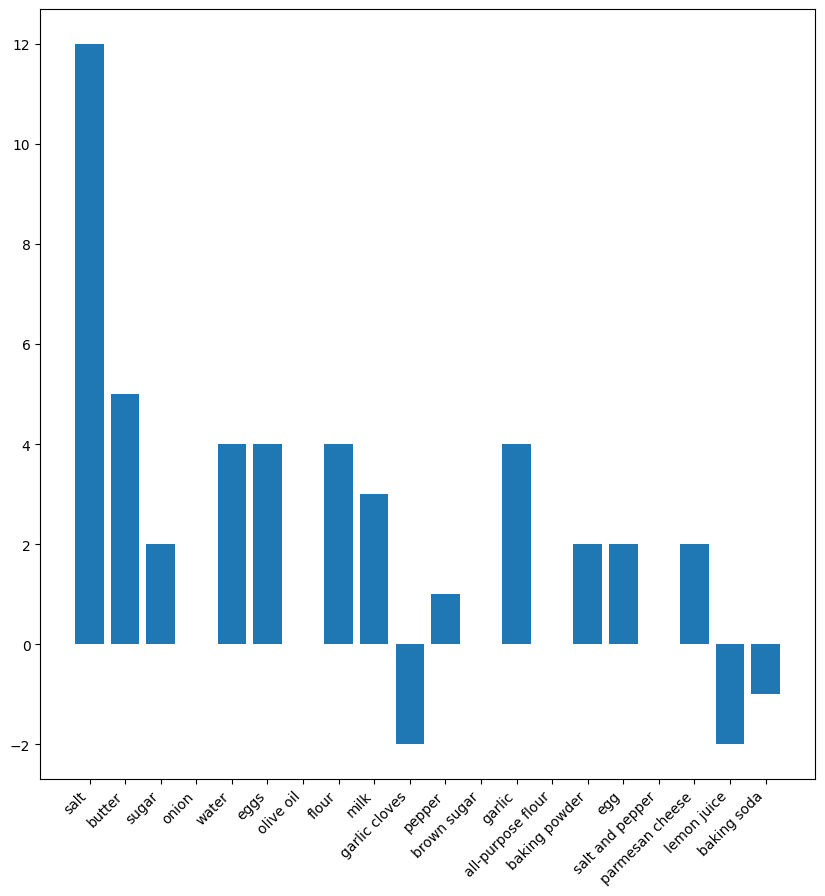

In [19]:
def plot_closeness(closeness_df):
  plt.figure(figsize=(10, 10))
  plt.bar(closeness_df.index, closeness_df.closeness)
  plt.xticks(rotation=45, ha="right")
  plt.show()

plot_closeness(salted_df)

This plot makes sense but the salt is not very indicative as an ingredient. Let's use a more significant ingredient on a larger scale (all recipes and 1000 ingredients)

In [20]:
reduced_bool = recipes_bool.iloc[: , 1:1000 ] * 1
reduced_bool

,butter,sugar,onion,water,eggs,olive oil,flour,milk,garlic cloves,pepper,...,acorn squash,light coconut milk,strong coffee,brussels sprouts,unsweetened coconut milk,scallops,pimientos,nutritional yeast,chunky peanut butter,chili-garlic sauce
id,,,,,,,,,,,,,,,,,,,,,
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
43,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


let's pick an ingredient e.g. vanilla

In [21]:
vanilla_df = get_closeness("vanilla", reduced_bool)
#plot_closeness(vanilla_df)

# this plot is impssible to read if you increase the number of elements

This makes sense but also we don't want to have the spike on the same ingredient (remove) and we should normalize in some way.

as a positive point,  I could just use this by calculating this measure and taking the top n items.

In this case I can find out that vanilla is the closest to:

In [22]:
#showing the top combination ingredients excluding itself
def get_closest_items(ingredient, df, number):
  closeness_df = get_closeness(ingredient, df)
  return closeness_df.sort_values(by = "closeness", ascending= False)[1:number]

vanilla_closest = get_closest_items("vanilla", reduced_bool, 10)
vanilla_closest

,closeness
cocoa,-41
mini chocolate chip,-53
crisco,-91
unsweetened chocolate,-99
baking cocoa,-104
flax seed meal,-128
strong coffee,-159
chunky peanut butter,-163
food coloring,-163


let's pick another ingredient: banana

In [23]:
banana_closest = get_closest_items("banana", reduced_bool, 10)
banana_closest

,closeness
peach,-165
frozen blueberries,-168
vanilla yogurt,-207
low-fat plain yogurt,-219
flax seed meal,-220
nutritional yeast,-226
pear,-226
agave nectar,-226
chunky peanut butter,-227


This seems to work as an easy way to measure the top n items linked to one ingredient

# let's see what we can achieve with clustering

In [24]:
from sklearn.cluster import KMeans

In [25]:
data = reduced_bool.transpose()
data

id,38,39,40,41,43,45,46,48,49,50,...,537323,537331,537351,537429,537458,537459,537485,537543,537671,537716
butter,0,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
sugar,0,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
onion,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
water,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
eggs,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scallops,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pimientos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nutritional yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chunky peanut butter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# create the kmeans clusters

kmeans = KMeans(n_clusters=8)
kmeans.fit(data.drop(['cluster'], axis = 1))

data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
data

id,38,39,40,41,43,45,46,48,49,50,...,537331,537351,537429,537458,537459,537485,537543,537671,537716,cluster
butter,0,0,0,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,4
sugar,0,0,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3
onion,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
water,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
eggs,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
scallops,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
pimientos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
nutritional yeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
chunky peanut butter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [44]:
for i in range(0,8):
  group = data[data['cluster'] == i].index.tolist()
  print(f"Cluster {i}")
  print(group)

  print('\n')

Cluster 0
['garlic cloves']


Cluster 1
['onion', 'water', 'pepper', 'salt and pepper', 'parmesan cheese']


Cluster 2
['olive oil']


Cluster 3
['sugar', 'eggs', 'baking powder']


Cluster 4
['butter']


Cluster 5
['flour', 'brown sugar', 'garlic', 'all-purpose flour', 'egg', 'lemon juice', 'baking soda', 'vegetable oil', 'vanilla', 'black pepper', 'cinnamon', 'tomatoes', 'sour cream', 'garlic powder', 'vanilla extract', 'oil', 'honey', 'onions', 'cream cheese', 'garlic clove', 'celery', 'unsalted butter', 'soy sauce', 'mayonnaise', 'paprika', 'chicken broth', 'worcestershire sauce', 'extra virgin olive oil', 'fresh parsley', 'cornstarch', 'fresh ground black pepper', 'carrots', 'parsley', 'chili powder', 'ground cinnamon', 'carrot', 'nutmeg', 'cayenne pepper', 'granulated sugar', 'ground cumin', 'green onions', 'walnuts', 'pecans', 'powdered sugar', 'raisins']


Cluster 6
['milk']


Cluster 7
['cheddar cheese', 'bacon', 'potatoes', 'ground beef', 'red onion', 'dijon mustard', 'green 